Bu proje kapsamında 
https://dspillustrations.com/pages/posts/misc/python-ofdm-example.html adresinde Maximilian Matthe'nin anlattığı Python OFDM Örneği projesinin Türkçeleştirilmesi ve ekstra yorumlarla zenginleştirilmesi gerçekleştirilmiştir. Atlanmış olabilecek birtakım detaylar için yahut daha pek çok benzer projeyi görmek için websitesini ziyaret edebilirsiniz

### Kütüphanelerin Import Edilmesi

###### 1. Numpy

###### 2. Matplotlib

###### 3. Scipy


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

#### OFDM Subcarrier Sayısı: 
   İletişim için ayrılan bandwidth'in kaç farklı alt-taşıyıcı'ya bölüneceğini belirler. Örnek olarak eğer iletişim için ayrılan bandwidth 20 MHz ise 64 tane subcarrier'ın olması durumunda aslında 20 Mhz / 64 = 312.5 KHz ile tek birbirinde ortalama 312.5 KHz uzaklıktaki frekans aralıklarında yer alan 64 adet farklı frekanstaki alt taşıyıcıdan bahsetmiş oluruz
   
#### Cyclic-Prefix: 
   Cyclic prefix....
   
#### Pilot: 
   Pilot, iletişim kanalındaki zayıflamayı (attenuation) ve bozulmayı (distortion) belirlemek için kullanılan; hem verici hem de alıcı tarafından iletişim öncesi ortak belirlenmiş bilgi parçalarıdır. Pilot değerinin "olması gereken" formuyla "olduğu" formu kıyaslanarak iletilen sinyal üzerinde yaşanan zayıflama ve bozulma düzeltilebilir 

In [2]:
K = 64  # OFDM Subcarrier sayısı
CP = K//4  # Cyclic prefix uzunluğu, bu örnekte subcarrier sayısının %25'i olarak seçildi
P = 8  # Her kaç asıl datayı taşıyan subcarrier başına pilot-subcarrier oluşturulacağı
pilotValue = 3 + 3j # Pilot sinyalde karşılaştırma için kullanılacak, hem alıcı hem verici tarafından ortak bilinen data

allCarriers = np.arange(K)
pilotCarriers = allCarriers[::K//P]
pilotCarriers = np.hstack([pilotCarriers, np.array([allCarriers[-1]])])
P = P + 1

dataCarriers = np.delete(allCarriers, pilotCarriers)

allCarriers:   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
pilotCarriers: [ 0  8 16 24 32 40 48 56 63]
dataCarriers:  [ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 17 18 19 20 21 22 23 25 26 27
 28 29 30 31 33 34 35 36 37 38 39 41 42 43 44 45 46 47 49 50 51 52 53 54
 55 57 58 59 60 61 62]


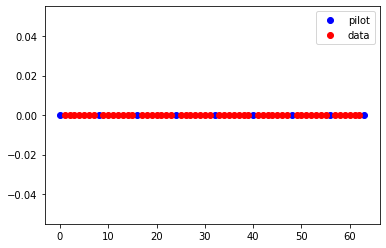

In [4]:
print ("allCarriers:   %s" % allCarriers)
print ("pilotCarriers: %s" % pilotCarriers)
print ("dataCarriers:  %s" % dataCarriers)
plt.plot(pilotCarriers, np.zeros_like(pilotCarriers), 'bo', label='pilot')
plt.plot(dataCarriers, np.zeros_like(dataCarriers), 'ro', label='data')
plt.legend()